# Envelope of the Sinc Function

In [7]:
import DistExampB as db
import sympy as sp
from matplotlib import pyplot as plot
from matplotlib.colors import hsv_to_rgb

from math import pi
from numpy import sinc
from sympy import Symbol

from LocUtil import Grid1
from Map import LogRatio
from Sinc import SincApprox

### Setup

In [8]:
xSym = Symbol('x')
zSym = Symbol('z')

In [9]:
map_ = LogRatio(xSym,zSym, (0,2))
X2Z = map_.Forward
Z2X = map_.Inverse
map_.forSym

log(x/(2 - x))

## Construct the Envelope of a Sinc-Approximation

In [10]:
nPlot = 201

In [11]:
h = 1/2
h

0.5

In [12]:
def TailEnv(z, zk,h):
	if abs((z - zk) / h) < 0.5:
		result = sinc((z - zk) / h)
	else:
		result = h / (pi * abs(z - zk))
	  
	return result

In [13]:
SincBase = lambda z,k,h: sinc(z/h - k)

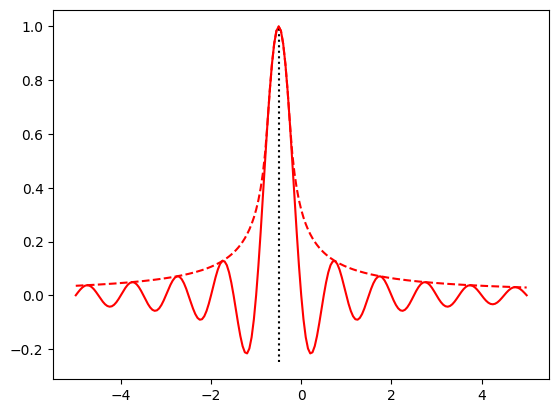

In [14]:
zGrid = Grid1(-5,5, nPlot)
sincGrid = tuple(SincBase(z,-1,h) for z in zGrid)
plot.plot(zGrid,sincGrid, c='red')

plot.plot([-h,-h],[-0.25,1], ':', c='black')

tailGrid = tuple(TailEnv(z,-1,h) for z in zGrid)
plot.plot(zGrid,tailGrid, '--', c='red')

In [15]:
color0 = tuple(hsv_to_rgb((1 - 1/12, 1, 1)))
color1 = tuple(hsv_to_rgb((1/12, 1, 1)))
color2 = tuple(hsv_to_rgb((1/2, 1, 1)))
color0, color1, color2

((1.0, 0.0, 0.5), (1.0, 0.5, 0.0), (0.0, 1.0, 1.0))

Text(0.5, 0, 'z')

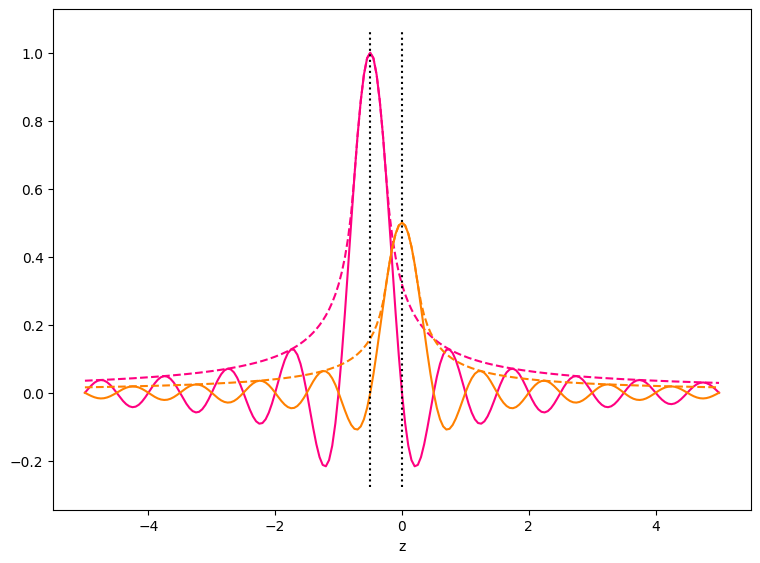

In [25]:
fig,ax = plot.subplots(figsize=(9,6.5))

zGrid = Grid1(-5,5, nPlot)

# point at z = -1
tailGridM = tuple(TailEnv(z,-1,h) for z in zGrid)
plot.plot(zGrid,tailGridM, '--', c=color0)

sincGridM = tuple(SincBase(z,-1,h) for z in zGrid)
plot.plot(zGrid,sincGridM, c=color0)

# point at z = 1
tailGridP = tuple(0.5 * TailEnv(z,0,h) for z in zGrid)
plot.plot(zGrid,tailGridP, '--', c=color1)

sincGridP = tuple(0.5 * SincBase(z,0,h) for z in zGrid)
plot.plot(zGrid,sincGridP, c=color1)

# other stuff
yRange = ax.get_ylim()
plot.plot([-h,-h], yRange, ':', c='black')
plot.plot([0 for _ in range(2)], yRange, ':', c='black')

plot.xlabel('z')

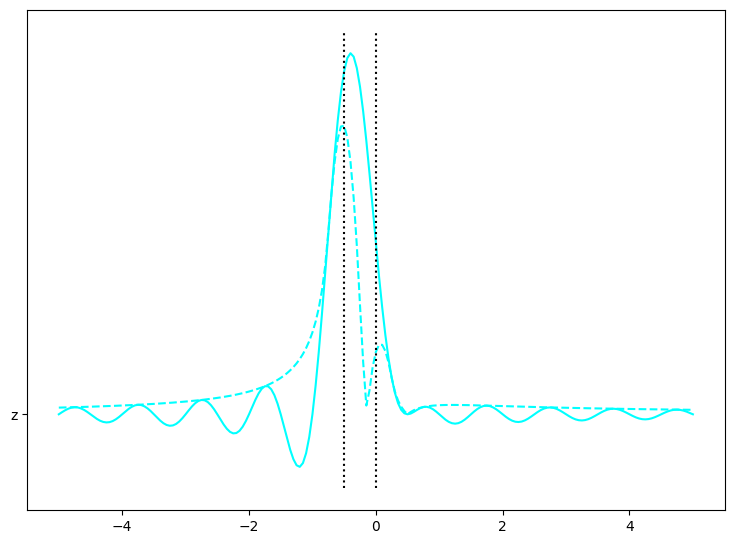

In [28]:
fig,ax = plot.subplots(figsize=(9,6.5))

tailGrid = tuple(abs(p - m) for (p,m) in zip(tailGridP, tailGridM))
plot.plot(zGrid,tailGrid, '--', c=color2)

sincGrid = tuple(p + m for (p,m) in zip(sincGridP, sincGridM))
plot.plot(zGrid,sincGrid, c=color2)

yRange = ax.get_ylim()
plot.plot([-h,-h], yRange, ':', c='black')
plot.plot([0 for _ in range(2)], yRange, ':', c='black')

plot.plot('z')

#### Check InterpZ0

In [69]:
approx = SincApprox(-1/2, 1/2, 3, (1,1/2,0), map_)

ValueError: x and y must have same first dimension, but have shapes (501,) and (201,)

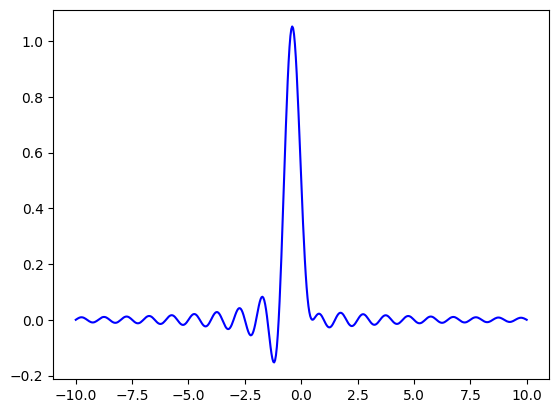

In [70]:
interpGrid = approx.InterpZ1(zGrid)
plot.plot(zGrid,interpGrid, c='blue')

sincShift = tuple(v + 0.05 for v in sincGrid)
plot.plot(zGrid,sincShift, c='red')

### Check Env function

In [ ]:
def Env(z, sincApprox):
	h = sincApprox.h
	nSinc = sincApprox.nSinc
	sincZ = sincApprox.sincZ
	sincV = sincApprox.sincV
	
	result = sum((-1)**k * sincV[k] * TailEnv(z,sincZ[k],h) for k in range(nSinc))
	return abs(result)

In [ ]:
fig,ax = plot.subplots(figsize=(9,6.5))

envGrid = tuple(Env(z, approx) for z in zGrid)
plot.plot(zGrid,envGrid, c='blue')

plot.plot('z')

## Create a Sinc-Approximation for the PDF

### SetUp

In [36]:
dist = db.ExampB()
nPlot = 501

Text(0, 0.5, 'PDF (density in x)')

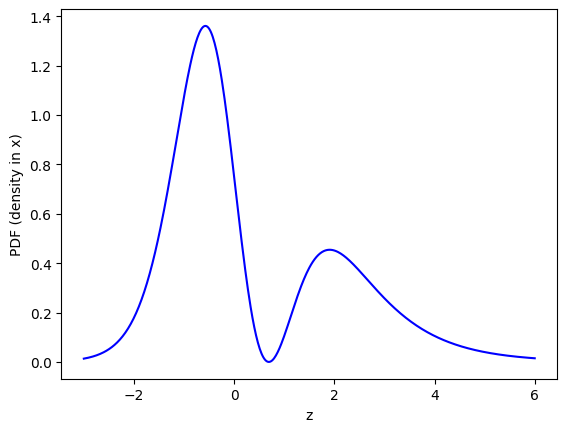

In [37]:
zGrid = Grid1(-3, 6, nPlot)
pdfGrid = tuple(dist.Pdf(Z2X(z)) for z in zGrid)

plot.plot(zGrid, pdfGrid, c='blue')

plot.xlabel('z')
plot.ylabel('PDF (density in x)')

## Distribution Example B

### Just the Interpolation without the Envelope

In [43]:
zMin, zMax = -3, 6
nSinc = 13
sincZ = Grid1(zMin, zMax, nSinc)

In [44]:
sincV = tuple(dist.Pdf(Z2X(z)) for z in sincZ)

In [45]:
approx = SincApprox(zMin, zMax, nSinc, sincV, map_)
h = approx.h

0.75

(0.0001, 9.203613743423885)

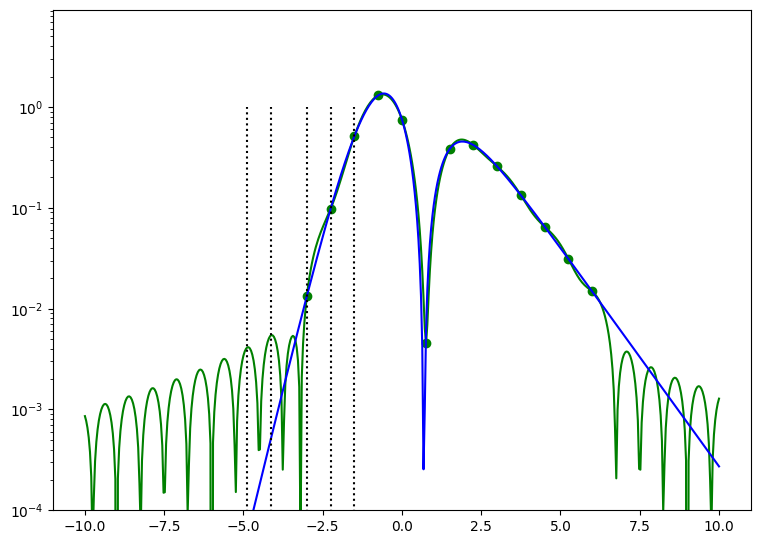

In [65]:
fig, ax = plot.subplots(figsize=(9, 6.5))

# plot the 
plot.semilogy(sincZ, sincV, 'o', c='green')

# plot the sinc-approximation
nPlot = 501
zGrid = Grid1(-10, 10, nPlot)
approxGrid = approx.InterpZ1(zGrid)
absAprox = tuple(abs(v) for v in approxGrid)

plot.semilogy(zGrid, absAprox, c='green')


pdfGrid = tuple(dist.Pdf(Z2X(z)) for z in zGrid)
plot.semilogy(zGrid,pdfGrid, c='blue')

# add decorations
yRange = (1e-4, max())
plot.semilogy([zMin + 2*h for _ in range(2)],[1e-5, 1], ':', c='black')
plot.semilogy([zMin + 1*h for _ in range(2)],[1e-5, 1], ':', c='black')
plot.semilogy([zMin for _ in range(2)],[1e-5, 1], ':', c='black')
plot.semilogy([zMin - 1.5*h for _ in range(2)],[1e-5, 1], ':', c='black')
plot.semilogy([zMin - 2.5*h for _ in range(2)],[1e-5, 1], ':', c='black')

_,yHigh = ax.get_ylim()
ax.set_ylim(1e-4, yHigh)

### Show Envelope

In [59]:
zRange = (-10,12)

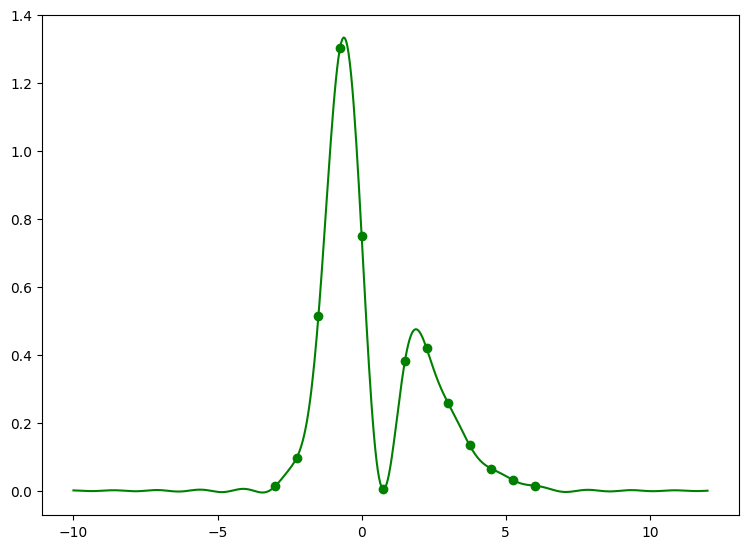

In [60]:
fig,ax = plot.subplots(figsize=(9,6.5))

plot.plot(sincZ,sincV, 'o', c='green')

zGrid = Grid1(*zRange, nPlot)
approxGrid = approx.InterpZ1(zGrid)
plot.plot(zGrid,approxGrid, c='green')

(1e-05, 4)

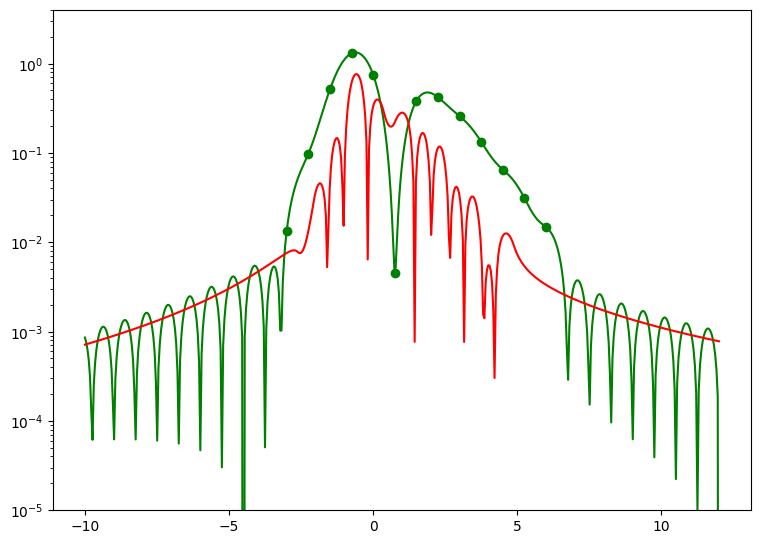

In [64]:
fig,ax = plot.subplots(figsize=(9,6.5))

# plot sinc points
plot.semilogy(sincZ,sincV, 'o', c='green')

# plot the sinc-approximation
zGrid = Grid1(*zRange,nPlot)
approxGrid = approx.InterpZ1(zGrid)
absApprox = tuple(abs(v) for v in approxGrid)

plot.semilogy(zGrid, absApprox, c='green')

# plot envolope
envGrid = tuple(Env(z,approx) for z in zGrid)
plot.plot(zGrid,envGrid, c='red')

ax.set_ylim(1e-4,4)

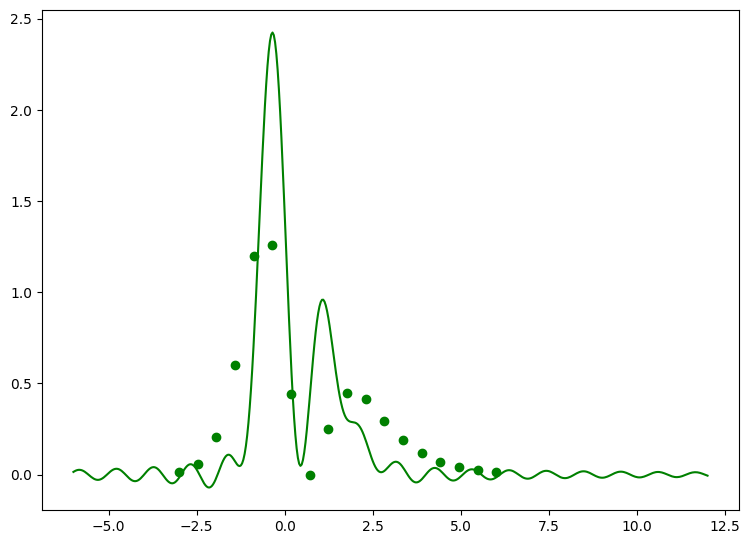

In [21]:
approx.nSinc

18